# Predicción de la Longitud de Pétalo de Iris

![Descripción](../../resources/08-nn.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [2]:
iris =datasets.load_iris()

In [3]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [45]:
session = tf.Session()

In [46]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

In [47]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [48]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [49]:
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [50]:
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

In [51]:
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

In [52]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [53]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_ouput = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [54]:
loss = tf.reduce_mean(tf.square(y_target-final_ouput))

In [55]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [56]:
init = tf.global_variables_initializer()
session.run(init)

In [57]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss))
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test))
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", Loss = "+str(temp_loss))

Paso #50, Loss = 0.9169457
Paso #100, Loss = 0.5577738
Paso #150, Loss = 0.3380683
Paso #200, Loss = 0.3212999
Paso #250, Loss = 0.21501562
Paso #300, Loss = 0.19254373
Paso #350, Loss = 0.20811631
Paso #400, Loss = 0.10464467
Paso #450, Loss = 0.08520257
Paso #500, Loss = 0.09899194


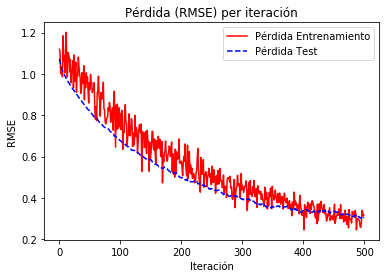

In [58]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()